# 강화학습 1

## 설정

In [1]:
import numpy

In [2]:
discount = 1
reward = -1        # 여기서는 벌점만 있음.
directions = [
    (0, 1),  # 동
    (0, -1), # 서
    (1, 0),  # 남  
    (-1, 0)  # 북
]

## Grid World

4x4의 16칸. 왼쪽위, 오른쪽 아래 각 1칸에 들어가면 성공

In [3]:
import seaborn as sns
sns.set()

In [4]:
%matplotlib inline
from matplotlib import pyplot

In [5]:
def draw_values(values, policy):
    line = 0.45
    color = '#919191'
    pyplot.axis([-1, 4, -1, 4])
    ax = sns.heatmap(values, vmax=0)
    
    for x in range(4):
        for y in range(4):
            for i, d in enumerate(directions):
                dx, dy = d
                p = policy[x, y, i]
                if p > 0:
                    ax.arrow(x + .5, 3 - y + .5, dx * line * p, -dy * line * p,
                             head_width=0.1, head_length=0.15, fc=color, ec=color)
    print(values)

In [6]:
# 초기화 함수

In [7]:
def init():
    values = numpy.zeros((4, 4))
    policy = numpy.array([[[0.25, 0.25, 0.25, 0.25]] * 4] * 4)   # 16칸. 각 칸에서 할 수 있는 행동 4가지. 각 행동의 확률 default 0.25
    policy[0, 0] = numpy.array([0, 0, 0, 0])
    policy[3, 3] = numpy.array([0, 0, 0, 0])
    return values, policy

In [8]:
# 이동

In [9]:
def move(pos, d):
    new_pos = pos + d
    new_pos = max(0, new_pos)
    new_pos = min(3, new_pos)
    return new_pos

In [10]:
# Policy Evaluation

In [11]:
def policy_evaluation(values, policy):
    update = values.copy()  # 값 복사.
    for x in range(4):
        for y in range(4):
            expectation = 0
            for i, d in enumerate(directions):
                dx, dy = d
                new_x = move(x, dx)  # 다음 상태의 좌표
                new_y = move(y, dy)

                # 벨만 방정식
                expectation += policy[x, y, i] * (reward + discount * values[new_x, new_y])
            update[x, y] = expectation
    return update

In [ ]:
# 초기화

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


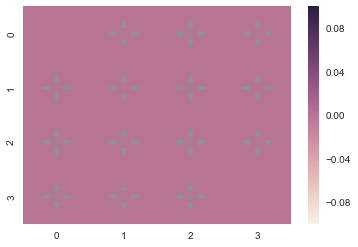

In [12]:
values, policy = init()
draw_values(values, policy)

[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]


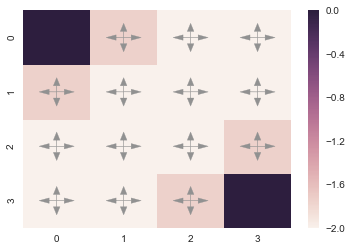

In [14]:
values = policy_evaluation(values, policy)
draw_values(values, policy)

In [15]:
# Policy Iteration

In [16]:
def policy_iteration(values, policy):
    # 가치 평가
    values = policy_evaluation(values, policy)

    # 정책 수정
    policy = policy.copy()
    for x in range(4):
        for y in range(4):
            if (x, y) == (0, 0) or (x, y) == (3, 3):
                continue
            # 4방향의 가치를 구한다
            candidate = numpy.zeros(4)
            for i, d in enumerate(directions):
                dx, dy = d
                new_x = move(x, dx)
                new_y = move(y, dy)
                candidate[i] = values[new_x, new_y]
        
            # 확률이 기장 높은 방향으로 정책을 업데이트
            max_value = numpy.max(candidate)
            compare_max = (candidate == max_value).astype(int)
            prob = 1 / compare_max.sum()
            policy[x, y, :] = compare_max * prob
    return values, policy

In [17]:
values, policy = init()

[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


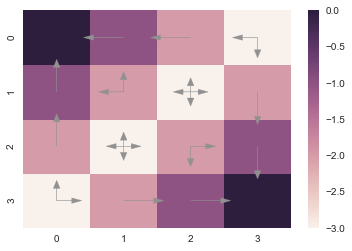

In [25]:
values, policy = policy_iteration(values, policy)
draw_values(values, policy)

In [26]:
# Value Iteration

In [27]:
def value_iteration(values):
    update = values.copy()
    for x in range(4):
        for y in range(4):
            if (x, y) == (0, 0) or (x, y) == (3, 3):
                continue
            candidate = numpy.zeros(4)
            for i, d in enumerate(directions):
                dx, dy = d
                new_x = move(x, dx)
                new_y = move(y, dy)
                candidate[i] = reward + discount * values[new_x, new_y]
            update[x, y] = numpy.max(candidate)
    return update

In [28]:
values, policy = init()

[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]


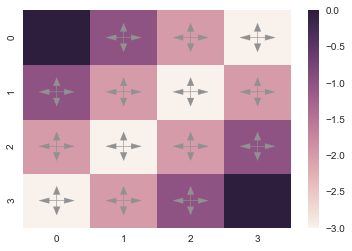

In [45]:
values = value_iteration(values)
draw_values(values, policy)   # 4가지 경우 중 값이 가장 높은 것이 현재 상태의 가치가 된다.